In [2]:
# Task 1: Dataset Loading and Initial Exploration

# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Attempt to load the Iris dataset
try:
    iris_data = load_iris()
    data = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
    data["species"] = pd.Series(iris_data.target).map(dict(enumerate(iris_data.target_names)))
    print("Iris dataset loaded successfully.")
except Exception as error:
    print(f"An error occurred while loading the dataset: {error}")

Iris dataset loaded successfully.


In [ ]:
# Display top 5 rows to preview the dataset
print("Previewing the dataset:")
print(data.head())

🔍 Previewing the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [4]:
# Check structure and basic information
print("\n Dataset Structure:")
print(data.info())

# Check for null values
print("\n Null Values:")
print(data.isnull().sum())


 Dataset Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

 Null Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [5]:
# Clean the dataset by removing any incomplete records (if any)
cleaned_data = data.dropna()
print("\n Data cleaned. Shape after cleaning:", cleaned_data.shape)


 Data cleaned. Shape after cleaning: (150, 5)


In [6]:
# Generate statistical summary for numeric features
print("\n Descriptive Statistics:")
print(cleaned_data.describe())


 Descriptive Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [7]:
# Group by species and calculate the average of each numeric column
species_group_mean = cleaned_data.groupby("species").mean()
print("\n Mean Measurements by Species:")
print(species_group_mean)


 Mean Measurements by Species:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  
species                       
setosa                 0.246  
versicolor             1.326  
virginica              2.026  


In [8]:
# Insight generation
print("\n Insight:")
print("Petal measurements significantly increase from setosa to virginica.")


 Insight:
Petal measurements significantly increase from setosa to virginica.


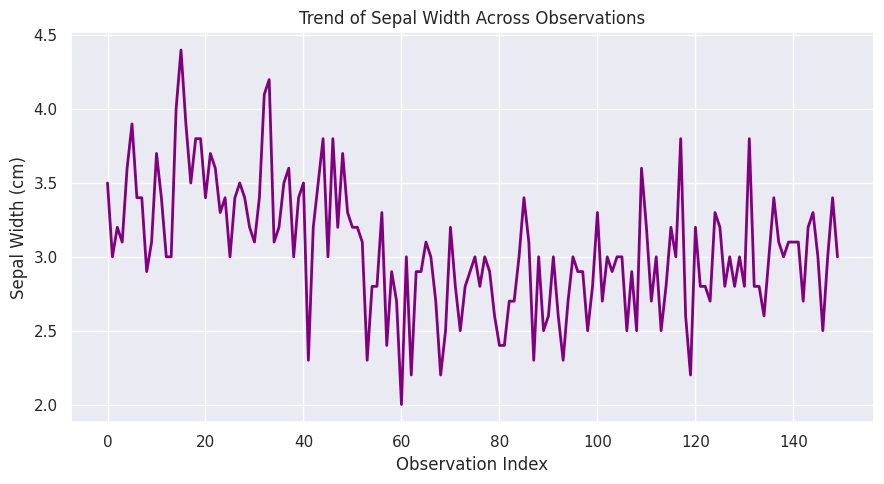

In [9]:
# Set a visual theme
sns.set_theme(style="darkgrid")

# 1. Line Plot – Just visualizing sepal width variation (not time-based)
plt.figure(figsize=(9, 5))
plt.plot(cleaned_data.index, cleaned_data["sepal width (cm)"], color="purple", lw=2)
plt.title("Trend of Sepal Width Across Observations")
plt.xlabel("Observation Index")
plt.ylabel("Sepal Width (cm)")
plt.tight_layout()
plt.show()

/tmp/ipykernel_17755/3768334549.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_group_mean.index, y=species_group_mean["sepal length (cm)"], palette="viridis")


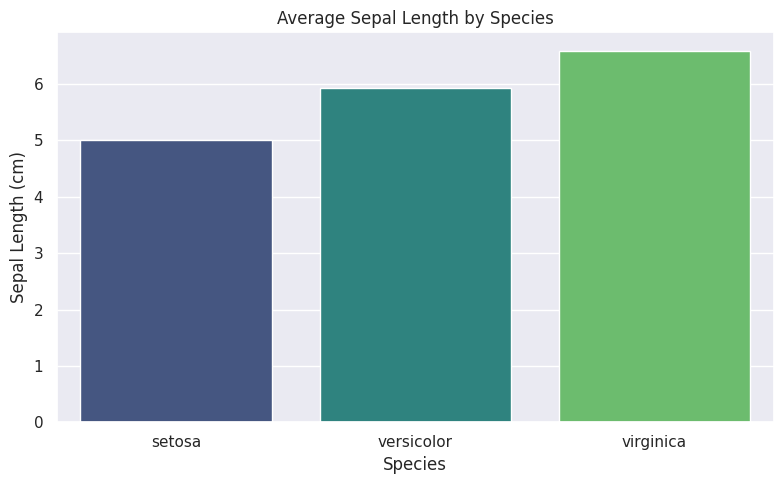

In [10]:
# 2. Bar Plot – Comparing average sepal length for each species
plt.figure(figsize=(8, 5))
sns.barplot(x=species_group_mean.index, y=species_group_mean["sepal length (cm)"], palette="viridis")
plt.title("Average Sepal Length by Species")
plt.ylabel("Sepal Length (cm)")
plt.xlabel("Species")
plt.tight_layout()
plt.show()

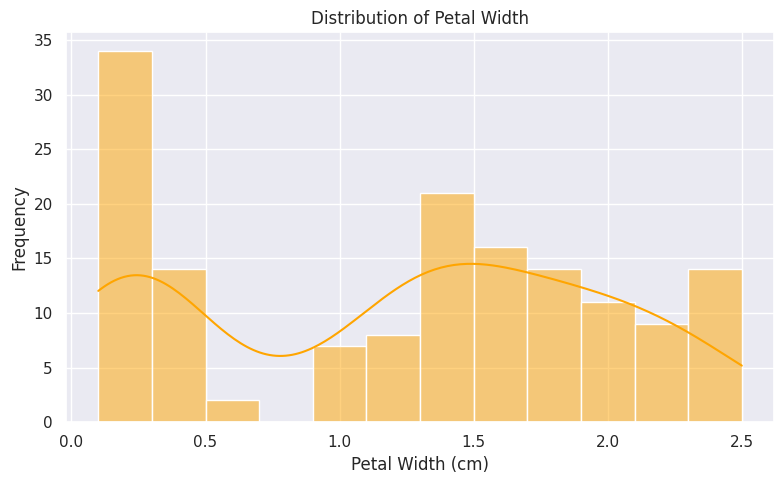

In [11]:
# 3. Histogram – Distribution of petal width
plt.figure(figsize=(8, 5))
sns.histplot(cleaned_data["petal width (cm)"], bins=12, kde=True, color="orange")
plt.title("Distribution of Petal Width")
plt.xlabel("Petal Width (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

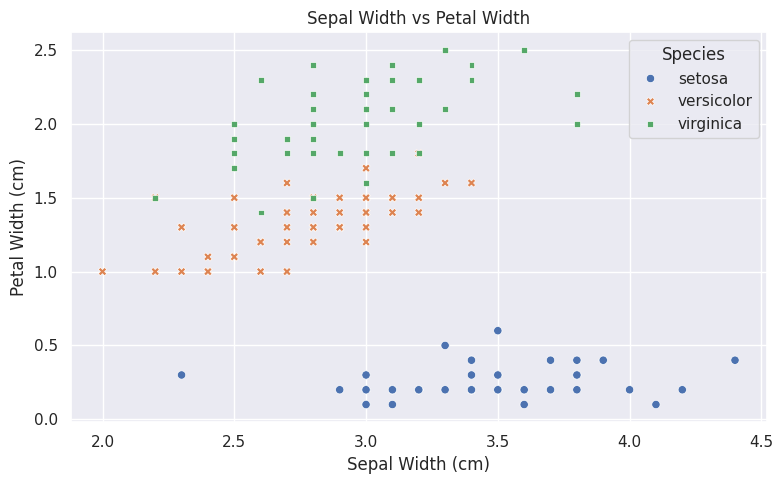

In [12]:
# 4. Scatter Plot – Sepal vs Petal Width
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=cleaned_data,
    x="sepal width (cm)",
    y="petal width (cm)",
    hue="species",
    style="species",
    palette="deep"
)
plt.title("Sepal Width vs Petal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.tight_layout()
plt.show()

In [13]:
# Summary conclusions
print("🔍 Summary of Observations:")
print("""
- Setosa flowers are clearly different from the other two species due to shorter petals.
- Sepal width is fairly consistent across species but slightly higher for Setosa.
- Petal width and sepal width have a moderately positive correlation in Versicolor and Virginica.
- The histogram shows that most petal widths fall below 1.8 cm.
""")

🔍 Summary of Observations:

- Setosa flowers are clearly different from the other two species due to shorter petals.
- Sepal width is fairly consistent across species but slightly higher for Setosa.
- Petal width and sepal width have a moderately positive correlation in Versicolor and Virginica.
- The histogram shows that most petal widths fall below 1.8 cm.

